./data/2024-05-10_10-30-05.txt
t
6518
p1
6518
p2
6518
m1
6518
m2
6518
e1
6518
e2
6518
I
6518
              t   p1   p2        m1        m2       e1       e2    I
0     2072360.0  0.0  0.0  178998.0 -149234.0  17754.0  25169.0  0.0
1     2072449.0  0.0  0.0  178998.0 -149234.0  17762.0  25170.0  0.0
2     2072488.0  0.0  0.0  178998.0 -149234.0  17753.0  25172.0  0.0
3     2072488.0  0.0  0.0  178998.0 -149234.0  17753.0  25172.0  0.0
4     2072488.0  0.0  0.0  178998.0 -149234.0  17753.0  25172.0  0.0
...         ...  ...  ...       ...       ...      ...      ...  ...
6513  2145037.0  0.0  0.0  186342.0 -146458.0  21102.0   8873.0  0.0
6514  2145052.0  0.0  0.0  186342.0 -146458.0  21050.0   8980.0  0.0
6515  2145060.0  0.0  0.0  186342.0 -146458.0  21010.0   9037.0  0.0
6516  2145075.0  0.0  0.0  186342.0 -146458.0  20978.0   9249.0  0.0
6517  2145082.0  0.0  0.0  186342.0 -146458.0  20968.0   9422.0  0.0

[6518 rows x 8 columns]


interactive(children=(IntSlider(value=0, description='start_index', max=6517), IntSlider(value=6517, descripti…

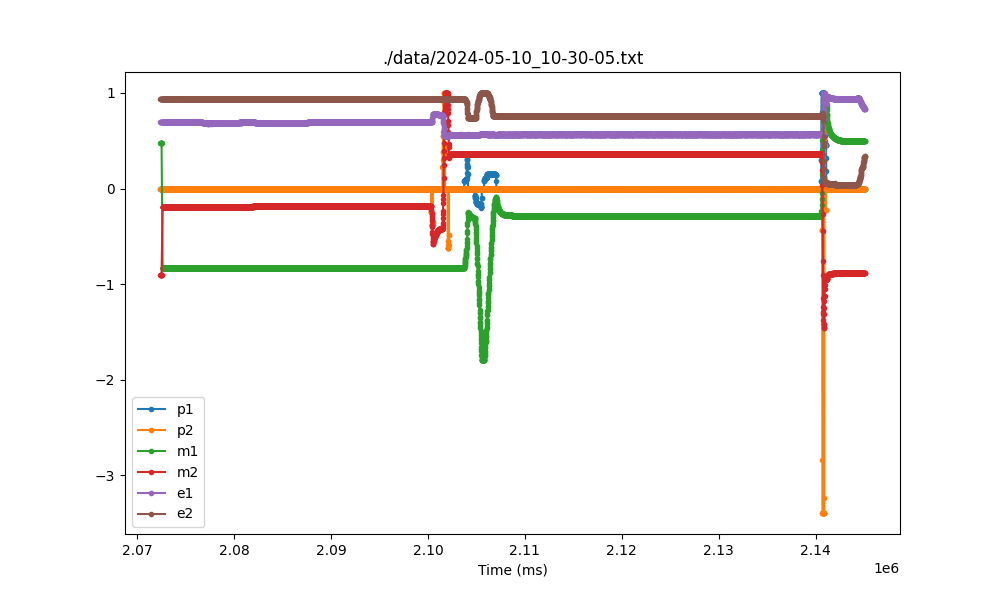

In [118]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import glob
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

list_of_files = [f for f in glob.glob('./data/*') if not os.path.isdir(f)] #take all files but not folders
latest_file = max(list_of_files, key=os.path.getctime)

file_path = latest_file
# file_path = "./data/2024-05-09_17-22-52.txt"
print(file_path)

# Read the text file into a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

labels = [
    't',
    'p1',
    'p2',
    'm1',
    'm2',
    'e1', 
    'e2', 
    'I'
]
data_dict = {label: [] for label in labels}

last_delimiter_index = 0

delimiter = '#'
messages = []
for i in range(len(lines)):
    if(lines[i].startswith(delimiter)):
        messages.append(lines[last_delimiter_index:i])
        last_delimiter_index = i
        # print("found ", i)

for message in messages:
    # print("message")
    # message_dict = dict.fromkeys(labels, [])
    message_dict = {label: [] for label in labels}
    for label in labels:
        for line in message:
                if(line.startswith(label)):
                    # print("append ", label, float(line.split(':')[1]))
                    message_dict[label].append(float(line.split(':')[1]))
                    # print(message_dict[label])
    # print(message_dict)
    full = True
    for key in message_dict:
        if(len(message_dict[key]) == 0):
            # print(message_dict)
            full=False
            break
    if(full):
        for label in labels:
            # print((message_dict[label]))
            data_dict[label].append(message_dict[label][0])
    
    # if(len)


for series in data_dict:
    print(series)
    print(len(data_dict[series]))
# Create a dataframe from the extracted values
df_raw = pd.DataFrame(data_dict)
df = None #cropped version

print(df_raw)


plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(10,6))
@interact(start_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=0),
          end_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=len(df_raw)-1))
def display_image(start_index, end_index):
    if(start_index >= end_index):
        return

    global df
    df = df_raw[start_index:end_index]
    df = df.reset_index()

    # df.loc[:,'t'] = df['t'] - df['t'][start_index]
    
    ax.clear()
    ax.set_title(file_path)
    ax.set_xlabel('Time (ms)')

    # df.loc[:,'m1'] *= 0.0005
    # df.loc[:,'m2'] *= -0.0005
    # # df.loc[:,'m1'] -= -78
    # df.loc[:,'e1'] *= 0.01
    # df.loc[:,'e2'] *= -0.01
    # # df.loc[:,'e2'] -= -266
    # df.loc[:,'I'] *= 0.01
    # df.loc[:,'p2'] *= -1


    ignore = ['t', 'I']
    for label in labels:
        if(label in ignore):
            continue
        ax.plot(df['t'], df[label] / max(df[label]), '.-', label=label)
    ax.legend()

    average_step_size = df['t'].diff().mean()
    print("Average Step Size:", average_step_size)
plt.show()




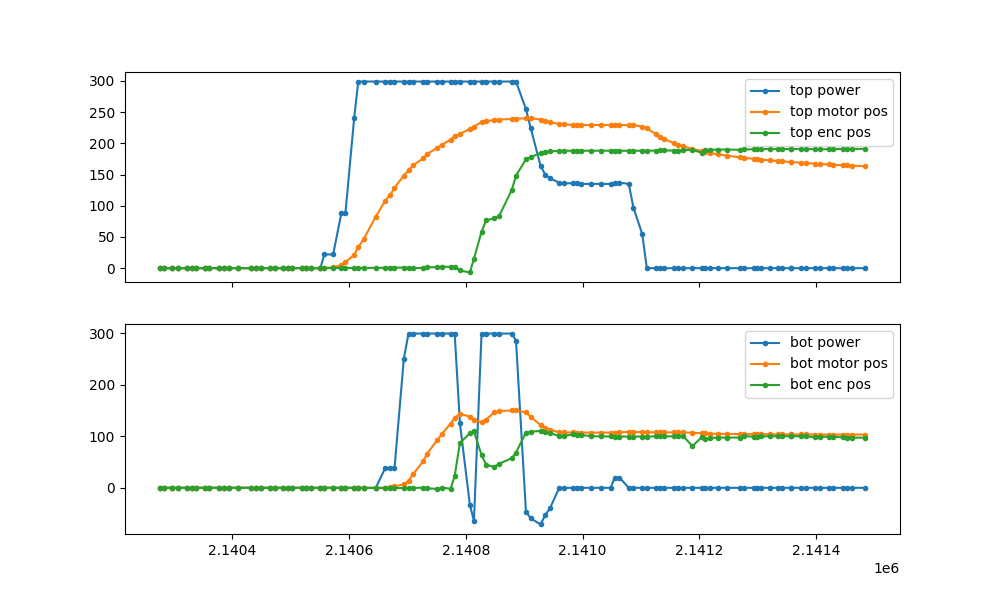

In [119]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6), sharex=True)


# df.loc[:,'m1'] *= 0.0005
# df.loc[:,'m2'] *= -0.0005

# df.loc[:,'e1'] *= 0.01
# df.loc[:,'e2'] *= -0.01

# df.loc[:,'I'] *= 0.01
# df.loc[:,'p2'] *= -1


ax1.plot(df['t'], df['p1'], '.-', label='top power')
ax1.plot(df['t'], (df['m1']-df['m1'][0]) * 0.0005, '.-', label='top motor pos')
ax1.plot(df['t'], (df['e2']-df['e2'][0]) * -0.01, '.-', label='top enc pos')
ax1.legend()

ax2.plot(df['t'], df['p2']*-1, '.-', label='bot power')
ax2.plot(df['t'], (df['m2']-df['m2'][0]) * -0.0005, '.-', label='bot motor pos')
ax2.plot(df['t'], (df['e1']-df['e1'][0]) * 0.01, '.-', label='bot enc pos')
ax2.legend()
plt.show()